In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.preprocessing import MinMaxScaler    
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,roc_auc_score,roc_curve
from sklearn import metrics

In [2]:
df=pd.read_csv('TCGA-BRCA.mirna.tsv',sep='\t')
df

,miRNA_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-LL-A5YP-01A,TCGA-E2-A14T-01A,TCGA-AR-A24O-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-E9-A24A-01A,TCGA-E9-A1RB-01A,...,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-A2-A0SV-01A,TCGA-BH-A0BO-01A,TCGA-B6-A0RN-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,hsa-let-7a-1,12.686183,12.891305,12.887718,14.108360,13.461873,12.265034,12.998680,13.383760,12.845777,...,12.978411,14.018583,12.404741,13.441146,13.168463,12.648896,14.119837,12.751446,13.497555,13.377192
1,hsa-let-7a-2,12.662222,12.869347,12.879000,14.118814,13.476615,12.241975,13.005067,13.380326,12.844904,...,12.960026,14.003807,12.380744,13.449313,13.154539,12.662858,14.135787,12.752993,13.505774,13.359864
2,hsa-let-7a-3,12.702090,12.888348,12.900761,14.155944,13.488667,12.290275,12.997857,13.388873,12.853264,...,12.967357,14.035824,12.439656,13.443056,13.196045,12.676500,14.147772,12.762161,13.497234,13.375518
3,hsa-let-7b,13.954108,15.019690,13.485065,13.811893,15.261777,13.809151,13.627295,14.974551,14.759085,...,14.674505,14.873317,14.013927,15.261052,16.636407,14.392788,14.788002,14.928173,14.451789,14.947434
4,hsa-let-7c,10.343736,10.822866,10.325324,11.047247,12.039291,9.057759,11.581334,10.195591,9.996306,...,11.401806,13.281604,9.512755,12.257532,11.504708,10.826527,13.046762,11.080933,12.224227,10.234638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,hsa-mir-9500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1877,hsa-mir-96,5.486710,5.365221,4.935182,5.246102,4.682331,5.539974,2.952988,4.192225,3.703261,...,6.000770,3.365852,3.899755,4.825829,5.970415,5.630192,1.504278,3.069699,4.148438,3.420965
1878,hsa-mir-98,5.943471,6.053592,6.782349,4.794847,5.562759,6.602330,5.489263,6.138740,6.054672,...,5.144954,5.184865,5.697202,5.400939,4.763354,5.390010,5.901553,5.274988,5.420709,5.022092
1879,hsa-mir-99a,8.977608,9.241627,8.264888,9.254036,10.691980,7.303956,9.875042,8.418708,8.616531,...,10.545658,11.636532,7.668619,10.337282,9.666720,9.517134,11.459398,9.178330,9.467839,9.313761


In [3]:
dff = df.reset_index(drop=True)
dff

,miRNA_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-LL-A5YP-01A,TCGA-E2-A14T-01A,TCGA-AR-A24O-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-E9-A24A-01A,TCGA-E9-A1RB-01A,...,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-A2-A0SV-01A,TCGA-BH-A0BO-01A,TCGA-B6-A0RN-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,hsa-let-7a-1,12.686183,12.891305,12.887718,14.108360,13.461873,12.265034,12.998680,13.383760,12.845777,...,12.978411,14.018583,12.404741,13.441146,13.168463,12.648896,14.119837,12.751446,13.497555,13.377192
1,hsa-let-7a-2,12.662222,12.869347,12.879000,14.118814,13.476615,12.241975,13.005067,13.380326,12.844904,...,12.960026,14.003807,12.380744,13.449313,13.154539,12.662858,14.135787,12.752993,13.505774,13.359864
2,hsa-let-7a-3,12.702090,12.888348,12.900761,14.155944,13.488667,12.290275,12.997857,13.388873,12.853264,...,12.967357,14.035824,12.439656,13.443056,13.196045,12.676500,14.147772,12.762161,13.497234,13.375518
3,hsa-let-7b,13.954108,15.019690,13.485065,13.811893,15.261777,13.809151,13.627295,14.974551,14.759085,...,14.674505,14.873317,14.013927,15.261052,16.636407,14.392788,14.788002,14.928173,14.451789,14.947434
4,hsa-let-7c,10.343736,10.822866,10.325324,11.047247,12.039291,9.057759,11.581334,10.195591,9.996306,...,11.401806,13.281604,9.512755,12.257532,11.504708,10.826527,13.046762,11.080933,12.224227,10.234638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,hsa-mir-9500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1877,hsa-mir-96,5.486710,5.365221,4.935182,5.246102,4.682331,5.539974,2.952988,4.192225,3.703261,...,6.000770,3.365852,3.899755,4.825829,5.970415,5.630192,1.504278,3.069699,4.148438,3.420965
1878,hsa-mir-98,5.943471,6.053592,6.782349,4.794847,5.562759,6.602330,5.489263,6.138740,6.054672,...,5.144954,5.184865,5.697202,5.400939,4.763354,5.390010,5.901553,5.274988,5.420709,5.022092
1879,hsa-mir-99a,8.977608,9.241627,8.264888,9.254036,10.691980,7.303956,9.875042,8.418708,8.616531,...,10.545658,11.636532,7.668619,10.337282,9.666720,9.517134,11.459398,9.178330,9.467839,9.313761


In [4]:
df_T= dff.set_index(
    'miRNA_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"miRNA_ID"})

In [5]:
new_df = df_T.loc[:, (df_T!=0).any(axis=0)]

In [6]:
df_T1=new_df.drop(columns='miRNA_ID')

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
df_T1.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,12.686183,12.662222,12.702090,13.954108,10.343736,9.295373,9.635422,10.590267,10.619278,9.196173,...,4.145751,0.0,0.000000,0.0,0.000000,1.626492,5.486710,5.943471,8.977608,16.204958
1,12.891305,12.869347,12.888348,15.019690,10.822866,9.947921,9.849888,10.752409,10.725704,9.326014,...,3.260019,0.0,3.338596,0.0,0.000000,4.381362,5.365221,6.053592,9.241627,14.983204
2,12.887718,12.879000,12.900761,13.485065,10.325324,9.747751,11.101686,11.889678,11.923924,8.743178,...,2.642097,0.0,2.718220,0.0,0.225409,1.428192,4.935182,6.782349,8.264888,15.917452
3,14.108360,14.118814,14.155944,13.811893,11.047247,7.606842,9.403753,11.586679,11.607801,8.834157,...,3.382545,0.0,2.269815,0.0,1.013901,1.013901,5.246102,4.794847,9.254036,15.303411
4,13.461873,13.476615,13.488667,15.261777,12.039291,8.730956,9.516602,11.293465,11.286356,8.520303,...,0.911711,0.0,1.865453,0.0,0.526707,1.466000,4.682331,5.562759,10.691980,15.412182


In [9]:
df_T1.shape
df_T1.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,12.686183,12.662222,12.702090,13.954108,10.343736,9.295373,9.635422,10.590267,10.619278,9.196173,...,4.145751,0.0,0.000000,0.0,0.000000,1.626492,5.486710,5.943471,8.977608,16.204958
1,12.891305,12.869347,12.888348,15.019690,10.822866,9.947921,9.849888,10.752409,10.725704,9.326014,...,3.260019,0.0,3.338596,0.0,0.000000,4.381362,5.365221,6.053592,9.241627,14.983204
2,12.887718,12.879000,12.900761,13.485065,10.325324,9.747751,11.101686,11.889678,11.923924,8.743178,...,2.642097,0.0,2.718220,0.0,0.225409,1.428192,4.935182,6.782349,8.264888,15.917452
3,14.108360,14.118814,14.155944,13.811893,11.047247,7.606842,9.403753,11.586679,11.607801,8.834157,...,3.382545,0.0,2.269815,0.0,1.013901,1.013901,5.246102,4.794847,9.254036,15.303411
4,13.461873,13.476615,13.488667,15.261777,12.039291,8.730956,9.516602,11.293465,11.286356,8.520303,...,0.911711,0.0,1.865453,0.0,0.526707,1.466000,4.682331,5.562759,10.691980,15.412182


In [10]:
df_T1.shape

(1202, 1604)

In [11]:
X=df_T1.values
X.shape

(1202, 1604)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [13]:
from sklearn.decomposition import PCA
pca_95=PCA(n_components=.95,random_state=2020)
pca_95.fit(X_scaled)
X_pca_95=pca_95.transform(X_scaled)

In [14]:
X_pca_95.shape

(1202, 673)

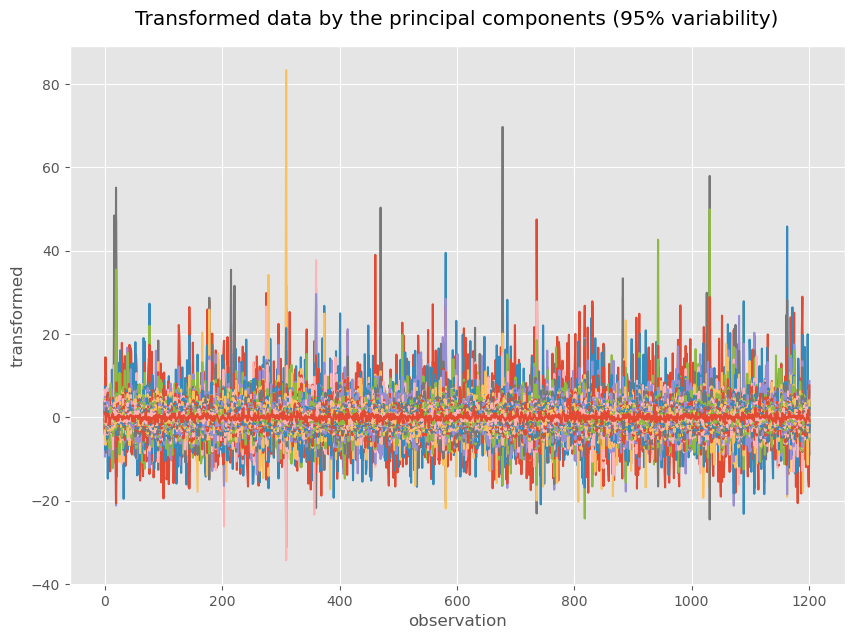

In [15]:
plt.figure(figsize=(10,7))
plt.plot(X_pca_95)
plt.xlabel('observation')
plt.ylabel('transformed')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.savefig('plot.png')

In [16]:
new_pd=pd.DataFrame(X_pca_95)

In [17]:
type(df_T)

pandas.core.frame.DataFrame

In [18]:
new_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,6.533957,-2.406532,-9.413739,2.391903,2.825275,0.013140,-2.177606,3.284697,-4.178565,-2.698059,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,14.408807,2.077421,5.997785,-1.624469,1.739537,4.392684,-1.075847,-6.703453,-0.671694,4.021331,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,10.051427,3.453803,5.221299,-8.463352,3.113520,6.031570,-3.398830,4.575557,-1.416554,-0.647369,...,0.152150,0.101182,-0.219033,-1.089174,-1.542839,2.118969,-0.703558,-0.523260,-1.844320,-1.148169
3,-0.874134,0.470171,-2.688745,1.078031,2.349833,-1.692876,2.723819,0.787323,1.502769,0.310545,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,-6.984240,2.260182,-2.494726,1.159850,-1.135161,-2.271852,-2.147577,-0.773485,0.232533,-2.008648,...,0.095129,0.282001,-0.031639,0.244799,0.273035,0.148204,0.232514,0.245772,0.322323,0.305413


In [19]:
#adding Ensemble_ID to the dataframe
#df2=new_pd
df1=df_T

In [20]:
df1.shape

(1202, 1882)

In [21]:
extracted_col = df1["miRNA_ID"]
print("column to added from first dataframe to second:")
display(extracted_col)
  

column to added from first dataframe to second:


0       TCGA-E9-A1NI-01A
1       TCGA-A1-A0SP-01A
2       TCGA-LL-A5YP-01A
3       TCGA-E2-A14T-01A
4       TCGA-AR-A24O-01A
              ...       
1197    TCGA-EW-A1P3-01A
1198    TCGA-A7-A13F-11A
1199    TCGA-A2-A0T6-01A
1200    TCGA-A7-A5ZW-01A
1201    TCGA-BH-A203-01A
Name: miRNA_ID, Length: 1202, dtype: object

In [22]:
new_pd.insert(0, "miRNA_ID", extracted_col)

In [23]:
new_pd.to_csv("RNA_Expression_data_filtered_with_PCA",index=False)

In [24]:
pheno_type=pd.read_csv('brca_tcga_pan_can_atlas_2018_clinical_data.tsv',sep='\t')

In [25]:
new_df1 = pheno_type.loc[:, (pheno_type!=0).any(axis=0)]

In [26]:
# delete the column 'Locations'
subset=new_df1.iloc[:,0:52]
csv2 = subset[['Patient ID', 'Sample ID','Diagnosis Age','Subtype']].copy()
csv2

,Patient ID,Sample ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50,BRCA_Her2
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,BRCA_LumB
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,BRCA_LumA
...,...,...,...,...
1079,TCGA-WT-AB44,TCGA-WT-AB44-01,77,BRCA_LumA
1080,TCGA-XX-A899,TCGA-XX-A899-01,46,BRCA_LumA
1081,TCGA-XX-A89A,TCGA-XX-A89A-01,68,BRCA_LumA
1082,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01,61,BRCA_LumA


In [27]:
subtype_counts= csv2.groupby("Subtype").size().rename("Count").reset_index()
subtype_counts

,Subtype,Count
0,BRCA_Basal,171
1,BRCA_Her2,78
2,BRCA_LumA,499
3,BRCA_LumB,197
4,BRCA_Normal,36


In [28]:
import matplotlib.pyplot as plt

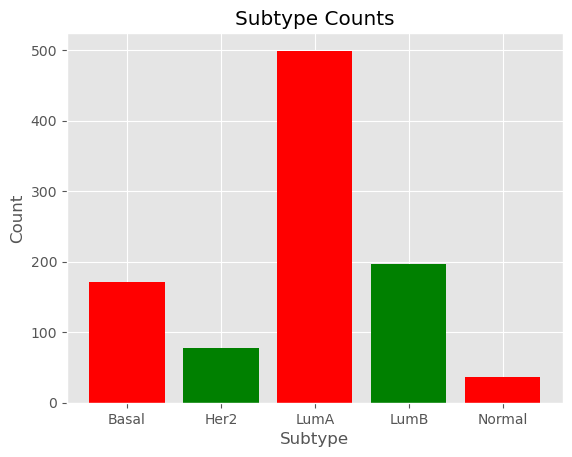

In [29]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [171, 78, 499, 197, 36]

# labels for bars
tick_label = ['Basal', 'Her2', 'LumA', 'LumB', 'Normal']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
		width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Subtype')
# naming the y-axis
plt.ylabel('Count')
# plot title
plt.title('Subtype Counts')

# function to show the plot
plt.show()

In [30]:
dff = new_pd.reset_index(drop=True)
dff

,miRNA_ID,0,1,2,3,4,5,6,7,8,...,663,664,665,666,667,668,669,670,671,672
0,TCGA-E9-A1NI-01A,6.533957,-2.406532,-9.413739,2.391903,2.825275,0.013140,-2.177606,3.284697,-4.178565,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,TCGA-A1-A0SP-01A,14.408807,2.077421,5.997785,-1.624469,1.739537,4.392684,-1.075847,-6.703453,-0.671694,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,TCGA-LL-A5YP-01A,10.051427,3.453803,5.221299,-8.463352,3.113520,6.031570,-3.398830,4.575557,-1.416554,...,0.152150,0.101182,-0.219033,-1.089174,-1.542839,2.118969,-0.703558,-0.523260,-1.844320,-1.148169
3,TCGA-E2-A14T-01A,-0.874134,0.470171,-2.688745,1.078031,2.349833,-1.692876,2.723819,0.787323,1.502769,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,TCGA-AR-A24O-01A,-6.984240,2.260182,-2.494726,1.159850,-1.135161,-2.271852,-2.147577,-0.773485,0.232533,...,0.095129,0.282001,-0.031639,0.244799,0.273035,0.148204,0.232514,0.245772,0.322323,0.305413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,TCGA-EW-A1P3-01A,-6.678515,-2.155164,-2.848370,1.114422,1.065696,0.198755,0.436206,0.044868,-1.226252,...,-0.593403,1.175592,0.666564,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922
1198,TCGA-A7-A13F-11A,-0.172698,19.917526,-2.748108,2.946966,-11.349913,-0.333011,2.864150,2.067156,0.011067,...,0.259987,-0.192044,-0.757305,-0.725903,0.136194,-0.998627,-0.952627,0.679527,-1.401141,-0.322672
1199,TCGA-A2-A0T6-01A,-14.756307,-5.121394,3.776444,-0.865679,1.985085,-3.077710,-3.438958,-2.850570,1.457406,...,-0.752642,0.043423,-0.524034,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742
1200,TCGA-A7-A5ZW-01A,-16.648644,3.374202,4.421409,-2.330785,6.586268,4.583377,-2.267125,1.955213,-0.827941,...,-0.156862,0.172691,0.374234,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584


In [31]:
csv2= csv2.rename(columns={"Sample ID": "miRNA_ID"})

In [32]:
csv2.miRNA_ID+="A"
csv2.head()

,Patient ID,miRNA_ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01A,50,BRCA_Her2
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01A,62,BRCA_LumB
3,TCGA-3C-AALK,TCGA-3C-AALK-01A,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01A,50,BRCA_LumA


In [33]:
final_data = pd.merge(dff,
    csv2,
    how="inner",
    on="miRNA_ID")
final_data.head()

,miRNA_ID,0,1,2,3,4,5,6,7,8,...,666,667,668,669,670,671,672,Patient ID,Diagnosis Age,Subtype
0,TCGA-E9-A1NI-01A,6.533957,-2.406532,-9.413739,2.391903,2.825275,0.013140,-2.177606,3.284697,-4.178565,...,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916,TCGA-E9-A1NI,51,BRCA_LumB
1,TCGA-A1-A0SP-01A,14.408807,2.077421,5.997785,-1.624469,1.739537,4.392684,-1.075847,-6.703453,-0.671694,...,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072,TCGA-A1-A0SP,40,BRCA_Basal
2,TCGA-LL-A5YP-01A,10.051427,3.453803,5.221299,-8.463352,3.113520,6.031570,-3.398830,4.575557,-1.416554,...,-1.089174,-1.542839,2.118969,-0.703558,-0.523260,-1.844320,-1.148169,TCGA-LL-A5YP,49,BRCA_Basal
3,TCGA-E2-A14T-01A,-0.874134,0.470171,-2.688745,1.078031,2.349833,-1.692876,2.723819,0.787323,1.502769,...,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327,TCGA-E2-A14T,52,BRCA_LumA
4,TCGA-AR-A24O-01A,-6.984240,2.260182,-2.494726,1.159850,-1.135161,-2.271852,-2.147577,-0.773485,0.232533,...,0.244799,0.273035,0.148204,0.232514,0.245772,0.322323,0.305413,TCGA-AR-A24O,43,BRCA_LumA


In [34]:
df_ = final_data.drop(columns=["miRNA_ID", "Patient ID", 
                              "Diagnosis Age"]).set_index("Subtype").reset_index().dropna()
df_.head()

,Subtype,0,1,2,3,4,5,6,7,8,...,663,664,665,666,667,668,669,670,671,672
0,BRCA_LumB,6.533957,-2.406532,-9.413739,2.391903,2.825275,0.013140,-2.177606,3.284697,-4.178565,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,BRCA_Basal,14.408807,2.077421,5.997785,-1.624469,1.739537,4.392684,-1.075847,-6.703453,-0.671694,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,BRCA_Basal,10.051427,3.453803,5.221299,-8.463352,3.113520,6.031570,-3.398830,4.575557,-1.416554,...,0.152150,0.101182,-0.219033,-1.089174,-1.542839,2.118969,-0.703558,-0.523260,-1.844320,-1.148169
3,BRCA_LumA,-0.874134,0.470171,-2.688745,1.078031,2.349833,-1.692876,2.723819,0.787323,1.502769,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,BRCA_LumA,-6.984240,2.260182,-2.494726,1.159850,-1.135161,-2.271852,-2.147577,-0.773485,0.232533,...,0.095129,0.282001,-0.031639,0.244799,0.273035,0.148204,0.232514,0.245772,0.322323,0.305413


In [35]:
df_.dropna

<bound method DataFrame.dropna of          Subtype          0         1         2         3         4         5  \
0      BRCA_LumB   6.533957 -2.406532 -9.413739  2.391903  2.825275  0.013140   
1     BRCA_Basal  14.408807  2.077421  5.997785 -1.624469  1.739537  4.392684   
2     BRCA_Basal  10.051427  3.453803  5.221299 -8.463352  3.113520  6.031570   
3      BRCA_LumA  -0.874134  0.470171 -2.688745  1.078031  2.349833 -1.692876   
4      BRCA_LumA  -6.984240  2.260182 -2.494726  1.159850 -1.135161 -2.271852   
...          ...        ...       ...       ...       ...       ...       ...   
1048   BRCA_LumA -11.827722 -3.454103 -3.300667  2.687888  3.837671 -0.681683   
1049   BRCA_LumA  -6.678515 -2.155164 -2.848370  1.114422  1.065696  0.198755   
1050   BRCA_LumA -14.756307 -5.121394  3.776444 -0.865679  1.985085 -3.077710   
1051   BRCA_LumA -16.648644  3.374202  4.421409 -2.330785  6.586268  4.583377   
1052   BRCA_Her2  -1.523366 -3.826979  8.724296 -8.879916  4.956615 -5.4315

In [36]:
df_.groupby('Subtype').size().reset_index().rename(columns={0:"Count"})

,Subtype,Count
0,BRCA_Basal,165
1,BRCA_Her2,76
2,BRCA_LumA,492
3,BRCA_LumB,188
4,BRCA_Normal,35


In [37]:
import torch
import torch.nn as nn
from torch.utils import data
import torch.nn.functional as F
from torch.autograd import Variable as V
import torch.optim as optim
from tqdm import tqdm
 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
Label= {
    'BRCA_LumA':0,
    'BRCA_LumB':1,
    'BRCA_Her2':2,
    'BRCA_Basal':3,
    'BRCA_Normal':4
}

Labels = {v: k for k, v in Label.items()}

df_['Subtype'].replace(Label, inplace=True)

In [40]:
X = df_.iloc[:,1:-1]

In [41]:
X_array=X.values

In [42]:
y = df_.iloc[:,0]
y

0       1
1       3
2       3
3       0
4       0
       ..
1048    0
1049    0
1050    0
1051    0
1052    2
Name: Subtype, Length: 956, dtype: int64

In [43]:
y_array=y.values
type(y_array)

numpy.ndarray

In [44]:
import torch
X = torch.from_numpy(X_array).type(torch.float)
y = torch.from_numpy(y_array).type(torch.LongTensor)

# View the first five samples
X[:5], y[:5]

(tensor([[ 6.5340, -2.4065, -9.4137,  ..., -0.2807,  0.3409,  0.2917],
         [14.4088,  2.0774,  5.9978,  ...,  0.3612, -0.1686, -0.2620],
         [10.0514,  3.4538,  5.2213,  ..., -0.7036, -0.5233, -1.8443],
         [-0.8741,  0.4702, -2.6887,  ...,  0.2844, -0.9928, -0.3798],
         [-6.9842,  2.2602, -2.4947,  ...,  0.2325,  0.2458,  0.3223]]),
 tensor([1, 3, 3, 0, 0]))

In [45]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=1234) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)


(764, 192, 764, 192)

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [47]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [48]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print("After OverSampling, counts of label '4': {}".format(sum(y_train == 4)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train == 2)))  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (1945, 672)
After OverSampling, the shape of train_y: (1945,) 

After OverSampling, counts of label '4': 389
After OverSampling, counts of label '3': 389
After OverSampling, counts of label '2': 389
After OverSampling, counts of label '1': 389
After OverSampling, counts of label '0': 389


In [49]:
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [50]:
# Set the hyperparameters for data creation
NUM_CLASSES = 5
NUM_FEATURES =672 
RANDOM_SEED = 1234

In [51]:
X_train.shape

torch.Size([1945, 672])

tensor([[ 6.5340, -2.4065, -9.4137,  ..., -0.2807,  0.3409,  0.2917],
        [14.4088,  2.0774,  5.9978,  ...,  0.3612, -0.1686, -0.2620],
        [10.0514,  3.4538,  5.2213,  ..., -0.7036, -0.5233, -1.8443],
        [-0.8741,  0.4702, -2.6887,  ...,  0.2844, -0.9928, -0.3798],
        [-6.9842,  2.2602, -2.4947,  ...,  0.2325,  0.2458,  0.3223]]) tensor([1, 3, 3, 0, 0])


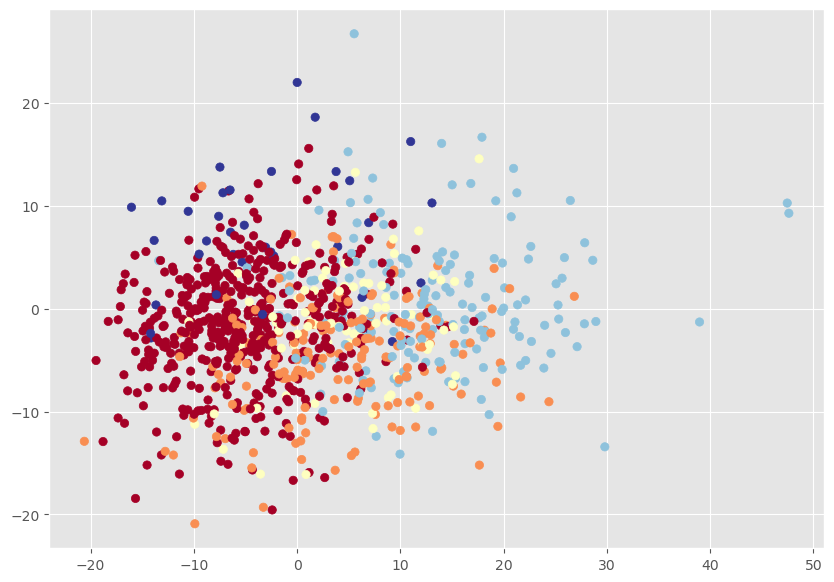

In [52]:
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);
print(X[:5], y[:5])

In [53]:

# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [54]:
from torch import nn

# Build model
class classificationModel(nn.Module):
    def __init__(self, input_features, output_features):
       
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=672, out_features=512),
            nn.Linear(in_features=512, out_features=256),
            nn.Linear(in_features=256,out_features=128), 
            nn.Linear(in_features=128,out_features=64), 
            nn.Linear(in_features=64,out_features=5),
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of ClassificationModel and send it to the target device
model_0 = classificationModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES).to(device)
model_0


classificationModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=672, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=5, bias=True)
  )
)

In [55]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.01) 

In [56]:
model_0(X_train.to(device))[:5]

tensor([[ 0.0241, -0.1769,  0.0046, -0.0851, -0.0570],
        [ 0.2811,  0.0230,  0.1403, -0.1876,  0.0217],
        [-0.0610, -0.0378, -0.0466, -0.1208, -0.1966],
        [ 0.0928,  0.0522, -0.0193, -0.0753, -0.0259],
        [ 0.0369,  0.0920, -0.0695, -0.1719, -0.1303]],
       grad_fn=<SliceBackward0>)

In [57]:
# How many elements in a single prediction sample?
model_0(X_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([5]), 5)

In [58]:
# Make prediction logits with model
y_logits = model_0(X_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.1211, -0.0959,  0.0753, -0.1374,  0.0351],
        [ 0.4744,  0.0939,  0.2374, -0.2971, -0.0411],
        [ 0.0875,  0.0984,  0.0256, -0.1418, -0.1779],
        [ 0.1207, -0.0464,  0.0761, -0.1568, -0.3015],
        [ 0.2593,  0.0081, -0.0364, -0.1527,  0.0733]],
       grad_fn=<SliceBackward0>)
tensor([[0.2247, 0.1809, 0.2147, 0.1735, 0.2062],
        [0.2831, 0.1935, 0.2234, 0.1309, 0.1691],
        [0.2216, 0.2240, 0.2083, 0.1762, 0.1699],
        [0.2372, 0.2007, 0.2269, 0.1797, 0.1555],
        [0.2491, 0.1938, 0.1853, 0.1650, 0.2068]], grad_fn=<SliceBackward0>)


In [59]:
# Sum the first sample output of the softmax activation function 
torch.sum(y_pred_probs[0])



tensor(1.0000, grad_fn=<SumBackward0>)

In [60]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))


tensor([0.2247, 0.1809, 0.2147, 0.1735, 0.2062], grad_fn=<SelectBackward0>)
tensor(0)


In [61]:
#y_train = y_train.type(torch.LongTensor)
y_train.dtype

torch.int64

In [62]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [63]:
# Fit the model
torch.manual_seed(1234)

# Set number of epochs
epochs = 300
#track
epoch_count=[]
acc_value=[]
test_acc_value=[]
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 1 == 0:
        epoch_count.append(epoch)
        acc_value.append(acc)
        test_acc_value.append(test_acc)
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.61222, Acc: 18.97% | Test Loss: 1.58491, Test Acc: 27.08%
Epoch: 1 | Loss: 1.60644, Acc: 20.26% | Test Loss: 1.58011, Test Acc: 30.21%
Epoch: 2 | Loss: 1.60072, Acc: 21.34% | Test Loss: 1.57535, Test Acc: 31.25%
Epoch: 3 | Loss: 1.59505, Acc: 22.47% | Test Loss: 1.57064, Test Acc: 34.38%
Epoch: 4 | Loss: 1.58941, Acc: 24.01% | Test Loss: 1.56598, Test Acc: 34.38%
Epoch: 5 | Loss: 1.58381, Acc: 25.35% | Test Loss: 1.56134, Test Acc: 34.90%
Epoch: 6 | Loss: 1.57823, Acc: 27.10% | Test Loss: 1.55674, Test Acc: 36.46%
Epoch: 7 | Loss: 1.57268, Acc: 29.25% | Test Loss: 1.55216, Test Acc: 38.02%
Epoch: 8 | Loss: 1.56714, Acc: 31.36% | Test Loss: 1.54759, Test Acc: 40.10%
Epoch: 9 | Loss: 1.56160, Acc: 34.29% | Test Loss: 1.54304, Test Acc: 41.15%
Epoch: 10 | Loss: 1.55607, Acc: 36.50% | Test Loss: 1.53849, Test Acc: 41.67%
Epoch: 11 | Loss: 1.55054, Acc: 38.77% | Test Loss: 1.53395, Test Acc: 42.71%
Epoch: 12 | Loss: 1.54501, Acc: 41.29% | Test Loss: 1.52940, Test Acc: 44.

Epoch: 109 | Loss: 0.82205, Acc: 80.21% | Test Loss: 1.02318, Test Acc: 59.90%
Epoch: 110 | Loss: 0.81536, Acc: 80.46% | Test Loss: 1.01944, Test Acc: 59.90%
Epoch: 111 | Loss: 0.80873, Acc: 80.57% | Test Loss: 1.01573, Test Acc: 59.90%
Epoch: 112 | Loss: 0.80216, Acc: 80.62% | Test Loss: 1.01206, Test Acc: 59.90%
Epoch: 113 | Loss: 0.79565, Acc: 80.77% | Test Loss: 1.00842, Test Acc: 60.94%
Epoch: 114 | Loss: 0.78920, Acc: 80.82% | Test Loss: 1.00481, Test Acc: 60.94%
Epoch: 115 | Loss: 0.78282, Acc: 80.93% | Test Loss: 1.00122, Test Acc: 60.94%
Epoch: 116 | Loss: 0.77649, Acc: 81.08% | Test Loss: 0.99767, Test Acc: 60.94%
Epoch: 117 | Loss: 0.77022, Acc: 81.18% | Test Loss: 0.99414, Test Acc: 61.46%
Epoch: 118 | Loss: 0.76400, Acc: 81.49% | Test Loss: 0.99063, Test Acc: 61.46%
Epoch: 119 | Loss: 0.75785, Acc: 81.65% | Test Loss: 0.98715, Test Acc: 61.46%
Epoch: 120 | Loss: 0.75175, Acc: 81.80% | Test Loss: 0.98369, Test Acc: 61.98%
Epoch: 121 | Loss: 0.74570, Acc: 81.90% | Test Loss:

Epoch: 219 | Loss: 0.36247, Acc: 90.03% | Test Loss: 0.70898, Test Acc: 74.48%
Epoch: 220 | Loss: 0.36028, Acc: 90.08% | Test Loss: 0.70709, Test Acc: 74.48%
Epoch: 221 | Loss: 0.35812, Acc: 90.13% | Test Loss: 0.70522, Test Acc: 74.48%
Epoch: 222 | Loss: 0.35599, Acc: 90.28% | Test Loss: 0.70337, Test Acc: 74.48%
Epoch: 223 | Loss: 0.35387, Acc: 90.33% | Test Loss: 0.70155, Test Acc: 74.48%
Epoch: 224 | Loss: 0.35178, Acc: 90.39% | Test Loss: 0.69974, Test Acc: 74.48%
Epoch: 225 | Loss: 0.34971, Acc: 90.39% | Test Loss: 0.69795, Test Acc: 74.48%
Epoch: 226 | Loss: 0.34766, Acc: 90.39% | Test Loss: 0.69618, Test Acc: 74.48%
Epoch: 227 | Loss: 0.34563, Acc: 90.44% | Test Loss: 0.69443, Test Acc: 74.48%
Epoch: 228 | Loss: 0.34362, Acc: 90.44% | Test Loss: 0.69270, Test Acc: 74.48%
Epoch: 229 | Loss: 0.34163, Acc: 90.49% | Test Loss: 0.69098, Test Acc: 75.00%
Epoch: 230 | Loss: 0.33967, Acc: 90.59% | Test Loss: 0.68929, Test Acc: 75.00%
Epoch: 231 | Loss: 0.33772, Acc: 90.64% | Test Loss:

In [64]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-5.4138, -3.8067, -0.6256,  6.0945,  3.1806],
        [-5.2102, -3.2082,  1.7906,  5.1822,  1.8437],
        [ 2.0270,  0.7991,  0.0399, -1.9611, -0.9550],
        [-0.4327,  0.3408,  1.9727, -0.5246, -1.2056],
        [ 1.2313,  2.6637, -0.8342, -0.9533, -2.2006],
        [ 3.1550,  1.4546, -1.7977, -2.5962, -0.6313],
        [ 3.8812,  0.3323, -1.8006, -3.2605,  0.5505],
        [ 1.7153,  2.8396,  0.3924, -2.0734, -2.7020],
        [ 4.2761,  1.8554, -0.7865, -4.2075, -1.4438],
        [-3.6778,  3.7799,  2.9147,  2.0741, -4.9408]])

In [65]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")


Predictions: tensor([3, 3, 0, 2, 1, 0, 0, 1, 0, 1])
Labels: tensor([3, 3, 0, 1, 1, 0, 0, 0, 0, 1])
Test accuracy: 76.5625%


In [66]:
import seaborn as sns

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

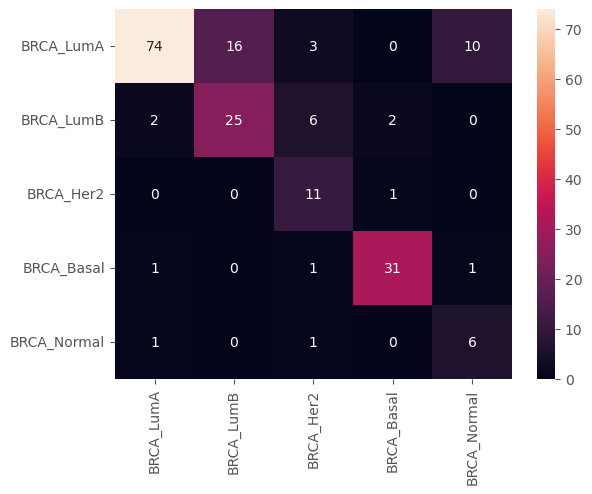

In [68]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_preds)).rename(columns=Labels, index=Labels)

sns.heatmap(confusion_matrix_df, annot=True)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       103
           1       0.61      0.71      0.66        35
           2       0.50      0.92      0.65        12
           3       0.91      0.91      0.91        34
           4       0.35      0.75      0.48         8

    accuracy                           0.77       192
   macro avg       0.66      0.80      0.70       192
weighted avg       0.83      0.77      0.78       192



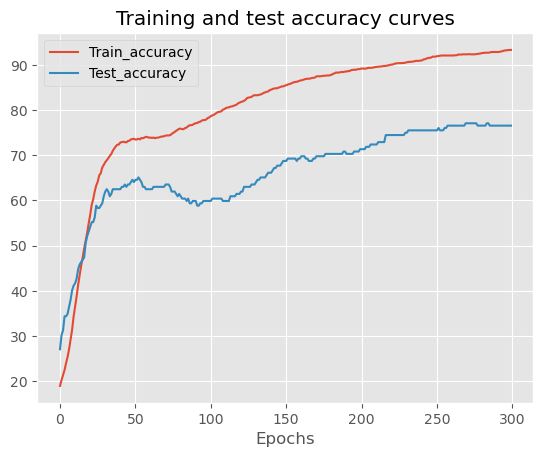

In [70]:
plt.plot(epoch_count,np.array(torch.tensor(acc_value).numpy()),label="Train_accuracy")
plt.plot(epoch_count,np.array(torch.tensor(test_acc_value).numpy()),label="Test_accuracy")
plt.title("Training and test accuracy curves")
plt.xlabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [71]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("C:/Users/jawad/OneDrive/Desktop/Surayya")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "Final_miRNA expression.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: C:\Users\jawad\OneDrive\Desktop\Surayya\Final_miRNA expression.pt


In [72]:
# Instantiate a fresh instance of classificationModel
loaded_model_0 = classificationModel('input_features','output_features')

# Load model state dict 
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_0.to(device)

print(f"Loaded model:\n{loaded_model_0}")
print(f"Model on device:\n{next(loaded_model_0.parameters()).device}")

Loaded model:
classificationModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=672, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=5, bias=True)
  )
)
Model on device:
cpu
